Data Collection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/Dataset-20221105T103729Z-001.zip'

Archive:  /content/drive/MyDrive/Dataset-20221105T103729Z-001.zip
  inflating: Dataset/TEST_SET/APPLES/r_184_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_31_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_19_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_24_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_112_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_124_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_18_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_17_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_105_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_13_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_27_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_183_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_111_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_120_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_14_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_118_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_28_100.jpg  
  inflating: Dataset/TEST_SET/APPLES/r_25_

In [ ]:
!unzip '/content/drive/MyDrive/TEST_SET-20221107T101717Z-001.zip'

Archive:  /content/drive/MyDrive/TEST_SET-20221107T101717Z-001.zip
   creating: TEST_SET/WATERMELON/
   creating: TEST_SET/PINEAPPLE/
  inflating: TEST_SET/istockphoto-1357864202-170667a.jpeg  
  inflating: TEST_SET/istockphoto-1357864202-170667a(1).jpeg  
  inflating: TEST_SET/ORANGE/n07749192_7720.jpg  
  inflating: TEST_SET/ORANGE/n07749192_8660.jpg  
  inflating: TEST_SET/ORANGE/n07749192_840.jpg  
  inflating: TEST_SET/ORANGE/n07749192_880.jpg  
  inflating: TEST_SET/ORANGE/n07749192_8351.jpg  
  inflating: TEST_SET/ORANGE/n07749192_881.jpg  
  inflating: TEST_SET/ORANGE/n07749192_691.jpg  
  inflating: TEST_SET/ORANGE/n07749192_8310.jpg  
  inflating: TEST_SET/ORANGE/n07749192_970.jpg  
  inflating: TEST_SET/ORANGE/n07749192_7900.jpg  
  inflating: TEST_SET/ORANGE/n07749192_9841.jpg  
  inflating: TEST_SET/ORANGE/n07749192_8680.jpg  
  inflating: TEST_SET/ORANGE/n07749192_891.jpg  
  inflating: TEST_SET/ORANGE/n07749192_841.jpg  
  inflating: TEST_SET/ORANGE/n07749192_9311.jpg  


In [ ]:
!unzip '/content/drive/MyDrive/TRAIN_SET-20221107T101816Z-001.zip'

Archive:  /content/drive/MyDrive/TRAIN_SET-20221107T101816Z-001.zip
  inflating: TRAIN_SET/BANANA/F1W6KNFM85YV.jpg  
  inflating: TRAIN_SET/BANANA/XBM7SUYAFEIC.jpg  
  inflating: TRAIN_SET/BANANA/PX9O3XPRZHY8.jpg  
  inflating: TRAIN_SET/BANANA/EX29HG5BJFPN.jpg  
  inflating: TRAIN_SET/BANANA/GHVVDBY4FT06.jpg  
  inflating: TRAIN_SET/BANANA/HEU5U6AU5J2B.jpg  
  inflating: TRAIN_SET/BANANA/E6TLL97ZLACT.jpg  
  inflating: TRAIN_SET/BANANA/4BG2TQP0XS80.jpg  
  inflating: TRAIN_SET/BANANA/4EHGKVNIELPU.jpg  
  inflating: TRAIN_SET/BANANA/CEG3KHRO3CPH.jpg  
  inflating: TRAIN_SET/BANANA/HXV1IGMRJ3RM.jpg  
  inflating: TRAIN_SET/BANANA/4GK79TR9DTYA.jpg  
  inflating: TRAIN_SET/BANANA/90IGPAO5KB6Q.jpg  
  inflating: TRAIN_SET/BANANA/P92KOOTPF9M2.jpg  
  inflating: TRAIN_SET/BANANA/0OF07407VBHI.jpg  
  inflating: TRAIN_SET/BANANA/GN104H8LC62S.jpg  
  inflating: TRAIN_SET/BANANA/MG5DOPM75IPN.jpg  
  inflating: TRAIN_SET/BANANA/CB0D2BBICMM6.jpg  
  inflating: TRAIN_SET/BANANA/L891POVW74X6.jpg  
 

DATA PREPROCESSING

In [ ]:
# Importing the ImageDataGenerator library
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Configure ImageDatagenerator class
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, shear_range = 0.2, zoom_range = 0.2) #for train data

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255) # for test data

In [12]:
# Applying ImageDataGenerator functionality to Testset
x_train = train_datagen.flow_from_directory(r'/content/TEST_SET', target_size =(64,64), class_mode = "sparse",batch_size=5,color_mode='rgb')

Found 929 images belonging to 5 classes.


In [13]:
# Applying ImageDataGenerator functionality to Trainset
x_test = test_datagen.flow_from_directory(r'/content/TRAIN_SET', target_size = (64,64), class_mode = "sparse", batch_size=5,color_mode='rgb')

Found 4118 images belonging to 5 classes.


In [14]:
print(x_train.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [15]:
print(x_test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [16]:
from collections import Counter as c
c(x_train.labels)

Counter({0: 266, 1: 415, 2: 248})

MODEL BUILDING

Importing model building libraries

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D,Flatten, Dense

In [18]:
model = Sequential()

Initializing the model

In [19]:
classifier = Sequential ()

Adding CNN layers

In [20]:
# Adding  Convolutional layer
classifier.add(Convolution2D(32,(3,3),activation = "relu", input_shape  = (64,64,3)))

In [21]:
classifier.add(MaxPooling2D(pool_size=(2,2))) #adding pooling layer

In [22]:
classifier.add(Convolution2D(32,(3,3),activation = "relu"))

In [23]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [24]:
classifier.add(Flatten()) #adding flatten layer

Adding Dense layers

In [25]:
classifier.add(Dense(units = 128,activation='relu')) #adding dense layer
#classifier.add(Dense(300,activation='relu')) #adding dense layer 2, we can add any no.of hiddden layers, here it is 2
classifier.add(Dense(units =5, activation ='softmax')) #adding output layer to the model

In [26]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)              

Configuring the learning process

In [27]:
classifier.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"], optimizer = 'adam') #compiling the model

Train The Model

In [29]:
classifier.fit_generator(generator=x_train,steps_per_epoch = len(x_train),epochs=20,validation_data=x_test,validation_steps = len(x_test))

Epoch 1/20
  2/186 [..............................] - ETA: 9s - loss: 0.0922 - accuracy: 1.0000 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


186/186 [==============================] - 30s 160ms/step - loss: 0.1578 - accuracy: 0.9408 - val_loss: 4.0874 - val_accuracy: 0.6513
Epoch 2/20
186/186 [==============================] - 21s 115ms/step - loss: 0.1472 - accuracy: 0.9440 - val_loss: 4.3559 - val_accuracy: 0.6901
Epoch 3/20
186/186 [==============================] - 29s 156ms/step - loss: 0.1498 - accuracy: 0.9451 - val_loss: 4.2314 - val_accuracy: 0.6780
Epoch 4/20
186/186 [==============================] - 20s 109ms/step - loss: 0.1510 - accuracy: 0.9505 - val_loss: 4.5923 - val_accuracy: 0.6926
Epoch 5/20
186/186 [==============================] - 20s 106ms/step - loss: 0.1047 - accuracy: 0.9623 - val_loss: 4.9992 - val_accuracy: 0.6731
Epoch 6/20
186/186 [==============================] - 20s 108ms/step - loss: 0.1217 - accuracy: 0.9537 - val_loss: 5.1061 - val_accuracy: 0.6812
Epoch 7/20
186/186 [==============================] - 22s 120ms/step - loss: 0.1001 - accuracy: 0.9752 - val_loss: 5.0344 - val_accuracy: 0.6


Save The Model

In [30]:
classifier.save('nutrition.h5')

Test The Model

In [31]:
import numpy as np
from tensorflow.keras.models  import load_model
from tensorflow.keras.preprocessing import image

In [32]:
model = load_model('nutrition.h5')

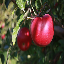

In [33]:
img = image.load_img(r'/content/TRAIN_SET/APPLES/n07740461_11134.jpg',grayscale=False,target_size= (64,64))
img

In [34]:
import numpy as np
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)

In [35]:
x.shape

(1, 64, 64, 3)

In [36]:
pred = np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 119ms/step


In [37]:
index=['APPLES', 'BANANA', 'ORANGE', 'PINEAPPLE', 'WATERMELON']
index[pred[0]]

'APPLES'